Student name: Jianwei Su

Date: 06/16/2022

10.2.1

# Use the dataset to perform a regression prediction using scikit-learn, as demonstrated in the lectures. 

In [1]:
import pandas as pd
df = pd.read_csv('scaffold_Portfolio.csv')
df.head()

,Unnamed: 0,Ticker,Position,Date,Company Name,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,...,Low,Open,Stock Splits,Volume,Daily return,1-week (5-day) moving average daily return,Rolling cumulative sum of volume,Daily P&L,Cumulative Daily P&L,Cumulative Daily Portfolio P&L
0,0,A,1000.0,2020-06-11,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,...,83.963763,87.528915,0.0,2491300.0,NaN,NaN,2.491300e+06,NaN,NaN,NaN
1,0,A,1000.0,2020-06-12,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,...,82.946557,85.751279,0.0,1520000.0,-0.343630,0.666799,4.386394e+09,-343.629883,-343.629883,-343.629883
2,0,A,1000.0,2020-06-15,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,...,82.670045,83.351475,0.0,1551400.0,-0.352033,0.661675,8.029150e+09,-352.032508,-695.662391,-695.662391
3,0,A,1000.0,2020-06-16,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,...,85.435260,87.775812,0.0,1049200.0,-0.344692,0.631249,1.140916e+10,-344.692313,-1040.354704,-1040.354704
4,0,A,1000.0,2020-06-17,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,...,86.373459,86.758613,0.0,900800.0,-0.355314,0.633189,1.489490e+10,-355.313842,-1395.668546,-1395.668546


In [2]:
df=df.drop(['Unnamed: 0'], axis=1) # inplace
df 

,Ticker,Position,Date,Company Name,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,...,Low,Open,Stock Splits,Volume,Daily return,1-week (5-day) moving average daily return,Rolling cumulative sum of volume,Daily P&L,Cumulative Daily P&L,Cumulative Daily Portfolio P&L
0,A,1000.0,2020-06-11,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872.0,...,83.963763,87.528915,0.0,2491300.0,NaN,NaN,2.491300e+06,NaN,NaN,NaN
1,A,1000.0,2020-06-12,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872.0,...,82.946557,85.751279,0.0,1520000.0,-0.343630,0.666799,4.386394e+09,-343.629883,-3.436299e+02,-3.436299e+02
2,A,1000.0,2020-06-15,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872.0,...,82.670045,83.351475,0.0,1551400.0,-0.352033,0.661675,8.029150e+09,-352.032508,-6.956624e+02,-6.956624e+02
3,A,1000.0,2020-06-16,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872.0,...,85.435260,87.775812,0.0,1049200.0,-0.344692,0.631249,1.140916e+10,-344.692313,-1.040355e+03,-1.040355e+03
4,A,1000.0,2020-06-17,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872.0,...,86.373459,86.758613,0.0,900800.0,-0.355314,0.633189,1.489490e+10,-355.313842,-1.395669e+03,-1.395669e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,AJG,-24000.0,2022-06-08,Gallagher,reports,Financials,Insurance Brokers,"Rolling Meadows, Illinois",2016-05-31,354190.0,...,160.839996,162.570007,0.0,467200.0,-0.116774,0.578155,1.239167e+12,2802.566125,6.056764e+04,3.262179e+07
6319,AKAM,25000.0,2022-06-08,Akamai,reports,Information Technology,Internet Services & Infrastructure,"Cambridge, Massachusetts",2007-07-12,1086222.0,...,100.739998,101.550003,0.0,840600.0,-0.374860,0.658978,1.239168e+12,-9371.509071,-5.631417e+04,3.261242e+07
6320,AMZN,-12000.0,2022-06-08,Amazon,reports,Consumer Discretionary,Internet & Direct Marketing Retail,"Seattle, Washington",2005-11-18,1018724.0,...,120.750000,122.610001,0.0,64926600.0,-0.541783,0.150232,1.239351e+12,6501.398886,1.275273e+06,3.261892e+07
6321,CCL,13000.0,2022-06-08,Carnival,reports,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","Miami, Florida",1998-12-22,815097.0,...,12.920000,13.350000,0.0,43179100.0,-0.929900,-0.086099,1.239530e+12,-12088.696087,-2.922958e+06,3.260683e+07


In [3]:
# Drop Nulls
df.dropna(subset=['Daily return','Open','Volume','1-week (5-day) moving average daily return'], inplace=True)
df

,Ticker,Position,Date,Company Name,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,...,Low,Open,Stock Splits,Volume,Daily return,1-week (5-day) moving average daily return,Rolling cumulative sum of volume,Daily P&L,Cumulative Daily P&L,Cumulative Daily Portfolio P&L
1,A,1000.0,2020-06-12,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872.0,...,82.946557,85.751279,0.0,1520000.0,-0.343630,0.666799,4.386394e+09,-343.629883,-3.436299e+02,-3.436299e+02
2,A,1000.0,2020-06-15,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872.0,...,82.670045,83.351475,0.0,1551400.0,-0.352033,0.661675,8.029150e+09,-352.032508,-6.956624e+02,-6.956624e+02
3,A,1000.0,2020-06-16,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872.0,...,85.435260,87.775812,0.0,1049200.0,-0.344692,0.631249,1.140916e+10,-344.692313,-1.040355e+03,-1.040355e+03
4,A,1000.0,2020-06-17,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872.0,...,86.373459,86.758613,0.0,900800.0,-0.355314,0.633189,1.489490e+10,-355.313842,-1.395669e+03,-1.395669e+03
5,A,1000.0,2020-06-18,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872.0,...,86.175948,86.343835,0.0,1491500.0,-0.355788,0.654477,1.758796e+10,-355.787915,-1.751456e+03,-1.751456e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,AJG,-24000.0,2022-06-08,Gallagher,reports,Financials,Insurance Brokers,"Rolling Meadows, Illinois",2016-05-31,354190.0,...,160.839996,162.570007,0.0,467200.0,-0.116774,0.578155,1.239167e+12,2802.566125,6.056764e+04,3.262179e+07
6319,AKAM,25000.0,2022-06-08,Akamai,reports,Information Technology,Internet Services & Infrastructure,"Cambridge, Massachusetts",2007-07-12,1086222.0,...,100.739998,101.550003,0.0,840600.0,-0.374860,0.658978,1.239168e+12,-9371.509071,-5.631417e+04,3.261242e+07
6320,AMZN,-12000.0,2022-06-08,Amazon,reports,Consumer Discretionary,Internet & Direct Marketing Retail,"Seattle, Washington",2005-11-18,1018724.0,...,120.750000,122.610001,0.0,64926600.0,-0.541783,0.150232,1.239351e+12,6501.398886,1.275273e+06,3.261892e+07
6321,CCL,13000.0,2022-06-08,Carnival,reports,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","Miami, Florida",1998-12-22,815097.0,...,12.920000,13.350000,0.0,43179100.0,-0.929900,-0.086099,1.239530e+12,-12088.696087,-2.922958e+06,3.260683e+07


<AxesSubplot:xlabel='Open', ylabel='Daily return'>

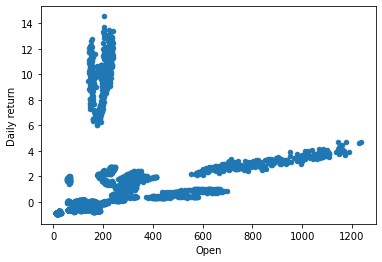

In [4]:
df.plot('Open', 'Daily return', kind='scatter')

<AxesSubplot:xlabel='Volume', ylabel='Daily return'>

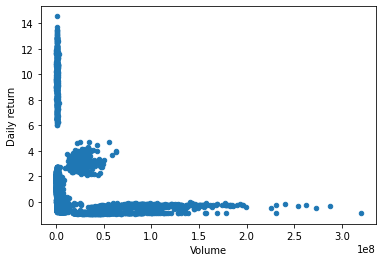

In [5]:
df.plot('Volume', 'Daily return', kind='scatter')

<AxesSubplot:xlabel='Daily return', ylabel='1-week (5-day) moving average daily return'>

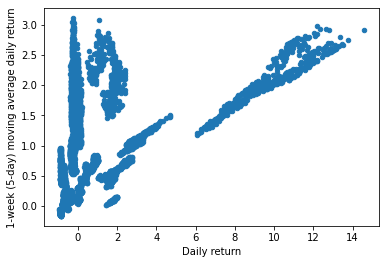

In [6]:
df.plot('Daily return','1-week (5-day) moving average daily return', kind='scatter')

## Regression

# You should split the data into test/train sets, train the model (output/comment the scores), cross validate the model (output/comment the scores), and predict using the test set (output/comment the scores and actual accuracy)

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, f1_score, r2_score
from sklearn.linear_model import LinearRegression

In [8]:
num_cols = ['Daily return']
cat_cols = []

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

pipeline = ColumnTransformer([
        ('num', num_pipeline, num_cols), 
        ('cat', OneHotEncoder(), cat_cols)
    ]) 

all_x_cols = num_cols + cat_cols
y_col = ['1-week (5-day) moving average daily return']

forest_rgr = LinearRegression()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[all_x_cols], df[y_col], test_size=0.33)

In [10]:
X_train

,Daily return
5145,-0.576535
6080,-0.241703
343,11.724194
1943,-0.003585
4561,-0.540936
...,...
2077,2.547554
3860,-0.609947
4694,-0.338310
4152,1.729754


In [11]:
X_test

,Daily return
5015,-0.748080
1070,0.695020
3584,-0.682594
2443,2.819485
444,-0.848027
...,...
5192,1.574632
6063,-0.595643
4487,-0.311708
1845,-0.853661


In [12]:
# Train!

X_train_xformed = pipeline.fit_transform(X_train)
X_test_xformed = pipeline.transform(X_test)
forest_rgr = forest_rgr.fit(X_train_xformed, y_train.values.ravel())

In [13]:
# Predict!

print('Train Scores\n')
train_pred = forest_rgr.predict(X_train_xformed)

print(f'R2: {r2_score(y_train.values.ravel(), train_pred)}')

print('\nTest Scores\n')
test_pred = forest_rgr.predict(X_test_xformed)

print(f'R2: {r2_score(y_test.values.ravel(), test_pred)}')

Train Scores

R2: 0.22890516991907683

Test Scores

R2: 0.20379529564805232


In [14]:
x_data = pipeline.fit_transform(df[all_x_cols])
y_data = df[y_col]
    
cross_pred = cross_val_predict(forest_rgr, x_data, y_data.values.ravel(), cv=100)

print(f'R2: {r2_score(y_data.values.ravel(), cross_pred)}')

R2: 0.21923056086387294


 The score is terrible!!!

In [15]:
predictData = pd.DataFrame({'Daily return':[2.66]})
display(predictData)

print(f'1-week (5-day) moving average daily return: {forest_rgr.predict(pipeline.transform(predictData))[0]:.2f}')

,Daily return
0,2.66


1-week (5-day) moving average daily return: 1.17


In [16]:
df['1-week (5-day) moving average daily return'][-1:]

6322    0.995141
Name: 1-week (5-day) moving average daily return, dtype: float64

The predictted value is not very close to the actual value. 

# Let's try more!!!

In [17]:
num_cols = ['Open', 'Volume']
cat_cols = []

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

pipeline = ColumnTransformer([
        ('num', num_pipeline, num_cols), 
        ('cat', OneHotEncoder(), cat_cols)
    ])

all_x_cols = num_cols + cat_cols
y_col = ['Daily return']

forest_rgr = LinearRegression()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[all_x_cols], df[y_col], test_size=0.33)

In [19]:
# Train!

X_train_xformed = pipeline.fit_transform(X_train)
X_test_xformed = pipeline.transform(X_test)
forest_rgr = forest_rgr.fit(X_train_xformed, y_train.values.ravel())

In [20]:
# Predict!

print('Train Scores\n')
train_pred = forest_rgr.predict(X_train_xformed)

print(f'R2: {r2_score(y_train.values.ravel(), train_pred)}')

print('\nTest Scores\n')
test_pred = forest_rgr.predict(X_test_xformed)

print(f'R2: {r2_score(y_test.values.ravel(), test_pred)}')

Train Scores

R2: 0.1230232722669784

Test Scores

R2: 0.1335522523307966


In [21]:
x_data = pipeline.fit_transform(df[all_x_cols])
y_data = df[y_col]
    
cross_pred = cross_val_predict(forest_rgr, x_data, y_data.values.ravel(), cv=100)

print(f'R2: {r2_score(y_data.values.ravel(), cross_pred)}')

R2: 0.12578529348568346


In [22]:
predictData = pd.DataFrame({'Open':[720],'Volume':[25403500]})
display(predictData)

print(f'Daily return: {forest_rgr.predict(pipeline.transform(predictData))[0]:.2f}')

,Open,Volume
0,720,25403500


Daily return: 2.95


In [23]:
df['Daily return'][-1:]

6322    2.65818
Name: Daily return, dtype: float64

 It's not very close to the actual value

# #######################

In [24]:
num_cols = ['Open']
cat_cols = []

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

pipeline = ColumnTransformer([
        ('num', num_pipeline, num_cols), 
        ('cat', OneHotEncoder(), cat_cols)
    ])

all_x_cols = num_cols + cat_cols
y_col = ['Close']

forest_rgr = LinearRegression()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[all_x_cols], df[y_col], test_size=0.33)

In [26]:
# Train!

X_train_xformed = pipeline.fit_transform(X_train)
X_test_xformed = pipeline.transform(X_test)
forest_rgr = forest_rgr.fit(X_train_xformed, y_train.values.ravel())

In [27]:
# Predict!

print('Train Scores\n')
train_pred = forest_rgr.predict(X_train_xformed)

print(f'R2: {r2_score(y_train.values.ravel(), train_pred)}')

print('\nTest Scores\n')
test_pred = forest_rgr.predict(X_test_xformed)

print(f'R2: {r2_score(y_test.values.ravel(), test_pred)}')

Train Scores

R2: 0.9986652422180025

Test Scores

R2: 0.9981799072917426


In [28]:
x_data = pipeline.fit_transform(df[all_x_cols])
y_data = df[y_col]
    
cross_pred = cross_val_predict(forest_rgr, x_data, y_data.values.ravel(), cv=100)

print(f'R2: {r2_score(y_data.values.ravel(), cross_pred)}')

R2: 0.9985103398559969


In [29]:
predictData = pd.DataFrame({'Open':[720]})
display(predictData)

print(f'Close: {forest_rgr.predict(pipeline.transform(predictData))[0]:.2f}')

,Open
0,720


Close: 729.38


In [30]:
df['Close'][-1:]

6322    725.599976
Name: Close, dtype: float64

This one is close to the actual value. 